In [1]:
from random import randint
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
class Die:
    def __init__(self, num_of_sides=6):
        self.num_of_sides = num_of_sides
    def roll(self):
        return randint(1, self.num_of_sides)

In [3]:
def roll_n_times(roll_times):
    # define an empty list to store the results of each roll
    list_res = []
    # simulate the rolling process
    for roll_num in range(roll_times):
        res = die_1.roll() * die_2.roll()
        list_res.append(res)
    list_res = sorted(list_res)
    # define an empty dictionary to store the time of each value
    dict_res = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 8:0, 9:0, 10:0, 12:0, 15:0, 16:0, 18:0, 20:0, 24:0, 25:0, 30:0, 36:0}
    for i in list_res:
        dict_res[i] = list_res.count(i)
    # output the result of a trail
#     for key in dict_res.keys():
#         print(f'{key}: {dict_res[key]} times')
    return dict_res, list_res

In [4]:
def plot_fX_x(save_figure=True):
    names = [1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15, 16, 18, 20, 24, 25, 30, 36]
    values = [1/36, 2/36, 2/36, 3/36, 2/36, 4/36, 2/36, 1/36, 2/36, 4/36, 2/36, 1/36, 2/36, 2/36, 2/36, 1/36, 2/36, 1/36]
    plt.ylim((0, 6 / 36))
    plt.yticks(np.arange(0, 6 / 36, 1 / 36),[r'$0$', r'$\frac{1}{36}$', r'$\frac{2}{36}$', r'$\frac{3}{36}$', r'$\frac{4}{36}$', r'$\frac{5}{36}$', r'$\frac{6}{36}$'])
    plt.xlabel(r'$x$')
    plt.ylabel(r'$f_X(x)$')
    plt.bar(range(len(names)), values, tick_label=names)
    if save_figure:
        plt.savefig('./figure/fX_x.eps',dpi=600,format='eps')
    plt.show()

In [5]:
def plot_relative_frequency_diagram(dict_res, n_trial, save_figure=True):
    plt.figure(figsize=(6, 4))
    names = list(dict_res.keys())
    values = [x / sum(dict_res.values()) for x in list(dict_res.values())]
    plt.ylim((0, 7 / 36))
    plt.yticks(np.arange(0, 7 / 36, 1 / 36),
               [r'$0$', r'$\frac{1}{36}$', r'$\frac{2}{36}$', r'$\frac{3}{36}$', r'$\frac{4}{36}$', r'$\frac{5}{36}$', r'$\frac{6}{36}$'])
    plt.xlabel(r'$x$')
    plt.ylabel('Relative Frequency')
    plt.bar(range(len(dict_res)), values, tick_label=names)
    if save_figure:
        plt.savefig(f'./figure/Relative_Frequency_n_trial_{n_trial}.eps', dpi=600, format='eps')
#         plt.savefig(f'./figure/Relative_Frequency_n_trial_{n_trial}.png', dpi=600, format='png')
    plt.show()

In [21]:
def plot_relative_frequency_diagram_compared(dict_res, n_trial, save_figure=True):
    plt.figure(figsize=(6, 4))
    names = list(dict_res.keys())
    values = [x / sum(dict_res.values()) for x in list(dict_res.values())]
    values_real = [1/36, 2/36, 2/36, 3/36, 2/36, 4/36, 2/36, 1/36, 2/36, 4/36, 2/36, 1/36, 2/36, 2/36, 2/36, 1/36, 2/36, 1/36]
    bar_width=0.4
    x_ = np.arange(len(values_real))
    plt.bar(x_ - bar_width / 2, values, bar_width, label='simulated result')
    plt.bar(x_ + bar_width / 2, values_real, bar_width, label=r'$f_X(x)$')
    plt.ylim((0, 7 / 36))
    plt.yticks(np.arange(0, 7 / 36, 1 / 36),
               [r'$0$', r'$\frac{1}{36}$', r'$\frac{2}{36}$', r'$\frac{3}{36}$', r'$\frac{4}{36}$', r'$\frac{5}{36}$', r'$\frac{6}{36}$'])
    plt.xlabel(r'$x$')
    tick_label = names
    plt.xticks(x_,tick_label)
    plt.legend(loc="upper left")
    if save_figure:
        plt.savefig(f'./figure/Compare_Relative_Frequency_n_trial_{n_trial}.eps', dpi=600, format='eps')
#         plt.savefig(f'./figure/Compare_Relative_Frequency_n_trial_{n_trial}.png', dpi=600, format='png')
    plt.show()

In [8]:
def compute_average_sn(list_res):
    return np.mean(list_res)

In [9]:
def compute_variance_sn(list_res):
    return np.var(list_res, ddof = 1)

In [10]:
def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf

In [46]:
def simulate_m_groups_n_samples(m, n, save_figure=True):
    samples_zn = []
    for i in range(0,1000):
        _, list_sample = roll_n_times(n)
        sample_mean = compute_average_sn(list_sample)
        sample_zn = math.sqrt(n) * (sample_mean - mu) / math.sqrt(sigma2)
        samples_zn.append(sample_zn)
    x=np.arange(-4.5,4.5,0.001)
    plt.plot(x, normfun(x, 0, 1), label=r'f(x)')
    plt.hist(samples_zn, bins=100, density=True, histtype='stepfilled',label=r'simulated result with bins=100')
    plt.xlabel(r'$Z_{50}(s_{50}^{i})$ for $i = 1, 2, \ldots, 1000$')
    plt.ylabel('Frequency')
    plt.legend(loc='upper left')
    if save_figure:
        plt.savefig(f'./figure/Simulate_{m}_groups_{n}_samples.eps', dpi=600, format='eps')
#         plt.savefig(f'./figure/Simulate_{m}_groups_{n}_samples.png', dpi=600, format='png')
    plt.show()

In [12]:
# define two dies
die_1 = Die()
die_2 = Die()

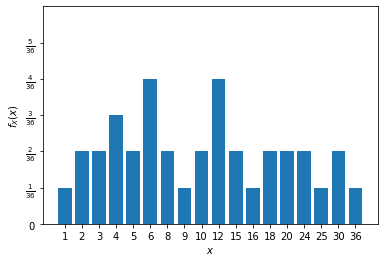

In [13]:
plot_fX_x()

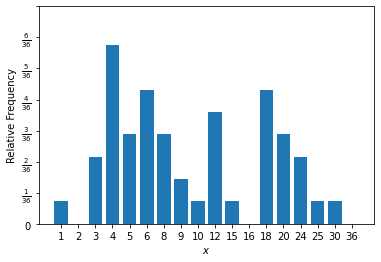

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


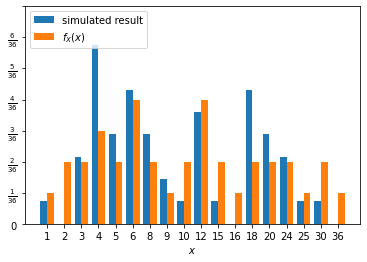

10.96
1.2899999999999991
55.63102040816327
24.334257369614498


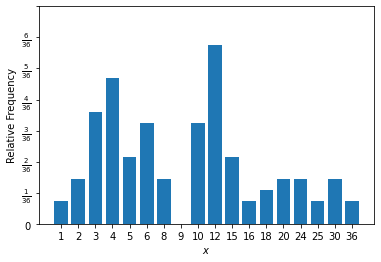

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


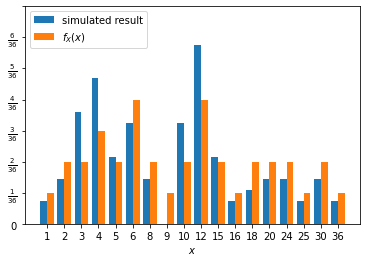

10.84
1.4100000000000001
67.46909090909091
12.496186868686863


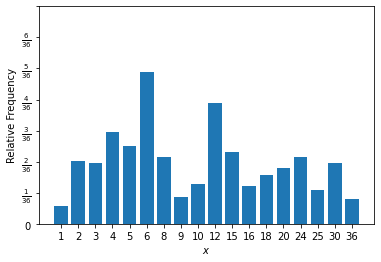

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


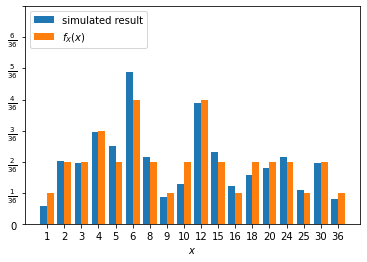

12.034
0.2159999999999993
76.73832064128257
3.2269571364952014


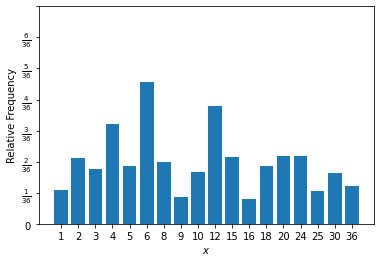

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


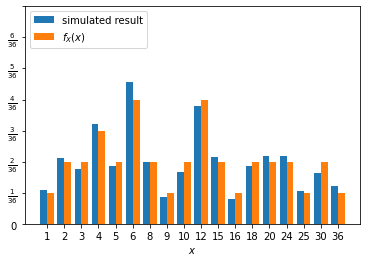

12.22
0.02999999999999936
82.14574574574576
2.180467967967985


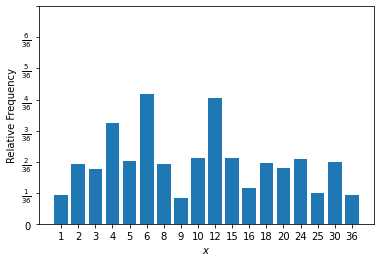

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


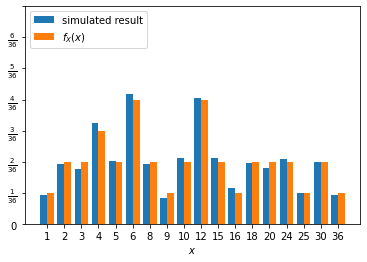

12.2438
0.006199999999999761
78.65969349869974
1.3055842790780332


In [59]:
n_trials = [50, 100, 500, 1000, 5000]
for times in n_trials:
    dict_times, list_times = roll_n_times(times)
    plot_relative_frequency_diagram(dict_times, times, True)
    plot_relative_frequency_diagram_compared(dict_times, times, True)
    print(compute_average_sn(list_times))
    print(abs(compute_average_sn(list_times) - 12.25))
    print(compute_variance_sn(list_times))
    print(abs(compute_variance_sn(list_times) - 11515/144))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


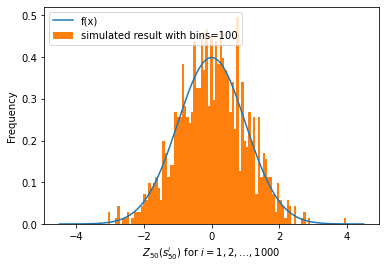

In [47]:
mu = 49/4
sigma2 = 11515/144
n = 50
m = 1000
simulate_m_groups_n_samples(m, n)